In [1]:
pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [3]:
minmaxscaler = MinMaxScaler()
standardScaler = StandardScaler()

In [4]:
from google.colab import drive
import os
import pandas as pd
dataset_root_folder = "/content/drive/MyDrive/Semantic segmentation dataset"

In [5]:
# extracting the tile images from the dataset


for path, subdirs, files in os.walk(dataset_root_folder):
    dir_name = path.split(os.path.sep)[-1]
    # print(dir_name)
    if dir_name=='images':
      print(path)
      images = os.listdir(path)
      # print(images)
      for i, image_name in enumerate(images):
        # print(image_name)
        if(image_name.endswith('.jpg')):
          a = True


/content/drive/MyDrive/Semantic segmentation dataset/Tile 1/images
/content/drive/MyDrive/Semantic segmentation dataset/Tile 7/images
/content/drive/MyDrive/Semantic segmentation dataset/Tile 6/images
/content/drive/MyDrive/Semantic segmentation dataset/Tile 4/images
/content/drive/MyDrive/Semantic segmentation dataset/Tile 3/images
/content/drive/MyDrive/Semantic segmentation dataset/Tile 5/images
/content/drive/MyDrive/Semantic segmentation dataset/Tile 2/images
/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images


array([[[201, 195, 190],
        [225, 219, 214],
        [241, 232, 228],
        ...,
        [255, 236, 231],
        [254, 234, 229],
        [255, 239, 234]],

       [[226, 220, 215],
        [254, 248, 243],
        [255, 255, 251],
        ...,
        [252, 231, 229],
        [247, 228, 223],
        [242, 223, 218]],

       [[248, 241, 238],
        [255, 252, 249],
        [255, 255, 251],
        ...,
        [253, 234, 231],
        [252, 235, 232],
        [245, 228, 225]],

       ...,

       [[211, 200, 203],
        [220, 209, 212],
        [221, 211, 217],
        ...,
        [220, 229, 242],
        [234, 243, 255],
        [235, 244, 255]],

       [[209, 198, 201],
        [219, 208, 211],
        [220, 210, 216],
        ...,
        [213, 222, 235],
        [222, 231, 244],
        [218, 227, 240]],

       [[213, 202, 205],
        [210, 199, 202],
        [201, 191, 197],
        ...,
        [223, 232, 245],
        [233, 242, 255],
        [230, 239, 252]]], dtype=uint8)
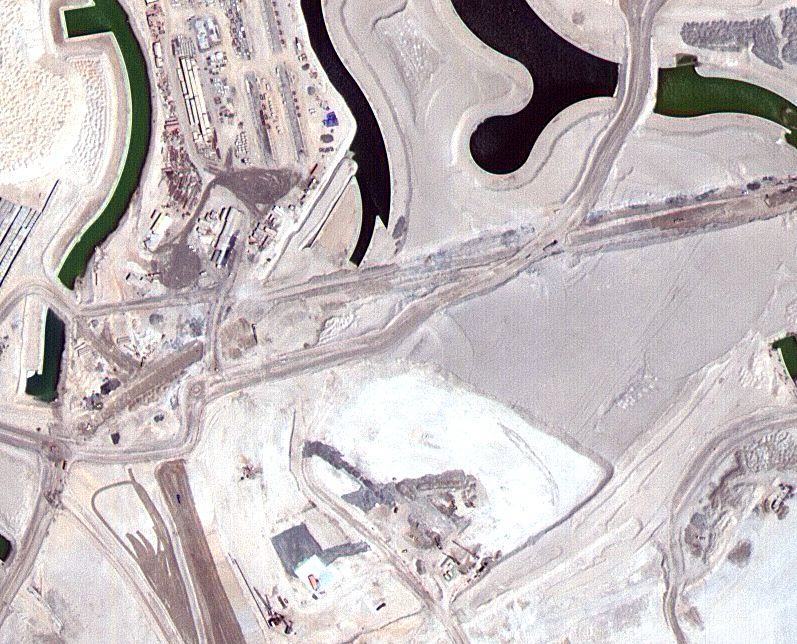

In [6]:
cv2.imread('/content/drive/MyDrive/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg',1)

array([[[111, 108, 110],
        [101,  98, 100],
        [117, 114, 116],
        ...,
        [ 17,  14,  16],
        [ 30,  23,  26],
        [ 34,  28,  29]],

       [[109, 106, 108],
        [ 94,  91,  93],
        [111, 108, 110],
        ...,
        [ 17,  13,  18],
        [ 26,  21,  23],
        [ 32,  26,  27]],

       [[101,  98, 100],
        [ 85,  82,  84],
        [ 97,  94,  96],
        ...,
        [ 25,  21,  26],
        [ 27,  22,  24],
        [ 31,  26,  28]],

       ...,

       [[ 75,  79,  74],
        [ 72,  73,  69],
        [ 56,  54,  53],
        ...,
        [ 18,  13,  22],
        [ 17,  12,  21],
        [ 17,  12,  21]],

       [[ 88,  91,  89],
        [ 73,  74,  72],
        [ 56,  54,  53],
        ...,
        [ 19,  14,  23],
        [ 19,  14,  23],
        [ 20,  15,  24]],

       [[ 92,  95,  93],
        [ 73,  76,  74],
        [ 64,  62,  61],
        ...,
        [ 22,  17,  26],
        [ 24,  19,  28],
        [ 26,  21,  30]]], dtype=uint8)
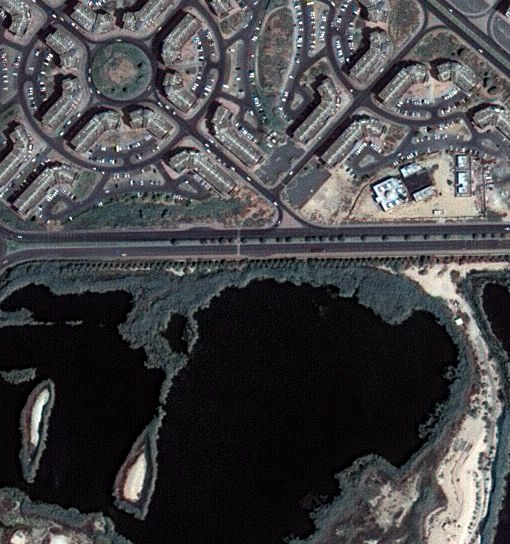

In [7]:
cv2.imread('/content/drive/MyDrive/Semantic segmentation dataset/Tile 2/images/image_part_005.jpg',1)

AS OBSERVED ABOVE THE SHAPE OF IMAGES OF ALL THE TILE ARE DIFFERENT SO WE HAVE TO CONVERT THEM IN SAME SHAPE

In [8]:
# reading the size of all the tile image dataset

image_dataset=[]
image_extenstion='jpg'
for tile_id in range(1,9):
  for image_id in range(1,20):
    image=cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/images/image_part_00{image_id}.{image_extenstion}',1)
    if image is not None:
      print(image.shape)

(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(643, 797, 3)
(643, 797, 3)
(643, 797, 3)
(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)
(2062, 1817, 3)
(2062, 1816, 3)
(2062, 1817, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)
(1479, 2149, 3)
(1479, 2149, 3)
(1479, 2149, 3)
(1480, 2149, 3)
(1480, 21

In [9]:
#make each tile image as a multiple of the patch size

image_patch_size = 256
image = cv2.imread('/content/drive/MyDrive/Semantic segmentation dataset/Tile 2/images/image_part_005.jpg',1)

# operation  (imageshape[i]//image_patch_size)*image_patch_size

print(image.shape)
print(((image.shape[0]//image_patch_size)*image_patch_size)) ## new shape of image
print(((image.shape[1]//image_patch_size)*image_patch_size)) ## new shape of image
print(((image.shape[2]//image_patch_size)*image_patch_size)) ## new shape of image

(544, 510, 3)
512
256
0


In [10]:
# Croping the imagees according to the multiple of patch size and patchify the image and perform normalisation

image_dataset=[]
image_patch_size = 256
image_extension='jpg'
for tile_id in range(1,8):
  for image_id in range(1,20):
    image=cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/images/image_part_00{image_id}.{image_extension}',1)
    if image is not None:
      # print(image.shape)
      size_x= (image.shape[1]//image_patch_size )*image_patch_size
      size_y= (image.shape[0]//image_patch_size )*image_patch_size
      # print(f'{image.shape} -- {size_x} -- {size_y}')
      image = Image.fromarray(image)      # converting the image from type ndarray to type image requires for cropping the image
      image = image.crop((0,0, size_x,size_y))
      # print('{}, {}'.format(image.size[0], image.size[1]))  # prints the new shape of image
      image = np.array(image)             # converting the image from image ndarray to type ndarray requires for patchifying  the image
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)  # patchify the image
      # print(patched_images.shape)
      # print(len(patched_images))           # tells us the number of patch image generated from each input image
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          indivisual_patched_image = patched_images[i,j,:,:]
          # print(indivisual_patched_image.shape)   # print the indivisual patched image
          indivisual_patched_image = minmaxscaler.fit_transform(indivisual_patched_image.reshape(-1, indivisual_patched_image.shape[-1])).reshape(indivisual_patched_image.shape)
          indivisual_patched_image = indivisual_patched_image[0]
          # print(indivisual_patched_image.shape)
          image_dataset.append(indivisual_patched_image)

In [11]:
len(image_dataset)

945

PROCESSING SATELLITE MASK IMAGES ALSO

In [12]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image=cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [13]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


RENDERING SOURCE AND MASK IMAGE

In [14]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

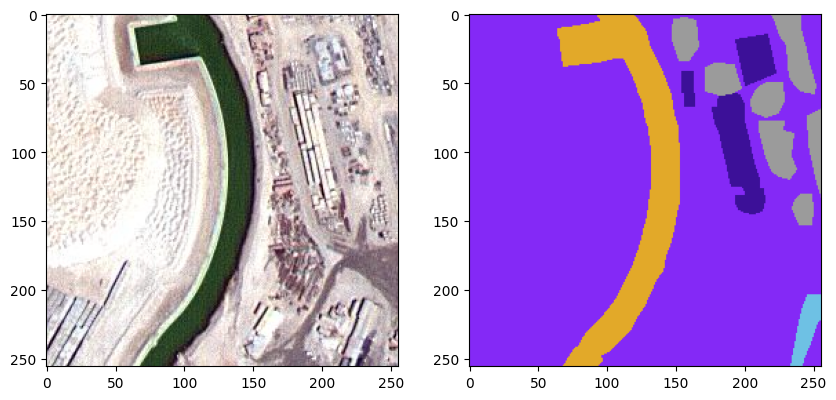

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(image_dataset[0])
plt.subplot(122)
plt.imshow(mask_dataset[0])

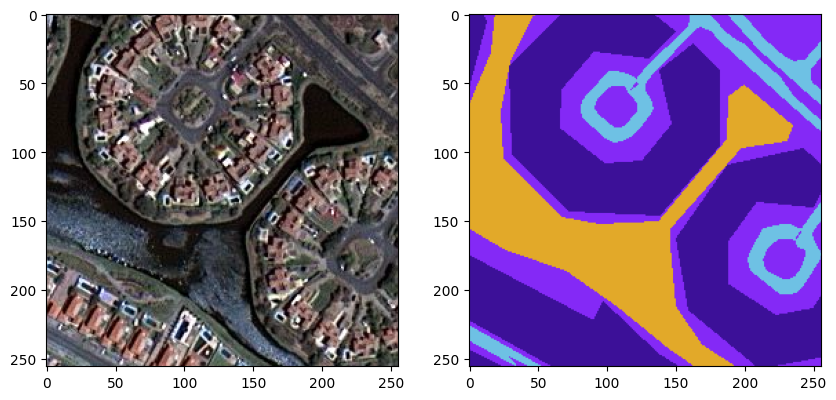

In [16]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

PROCESSING MASK IMAGE LABELS, APPLYING ONE-HOT-ENCODING WITH LABELS HEX IMAGE TYPE TO SET RGB LABEL

In [17]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [18]:
label = individual_patched_mask

In [19]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment


In [20]:
#  function to convert RGB VALUE IN 2D ARRAY
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [21]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [22]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [23]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


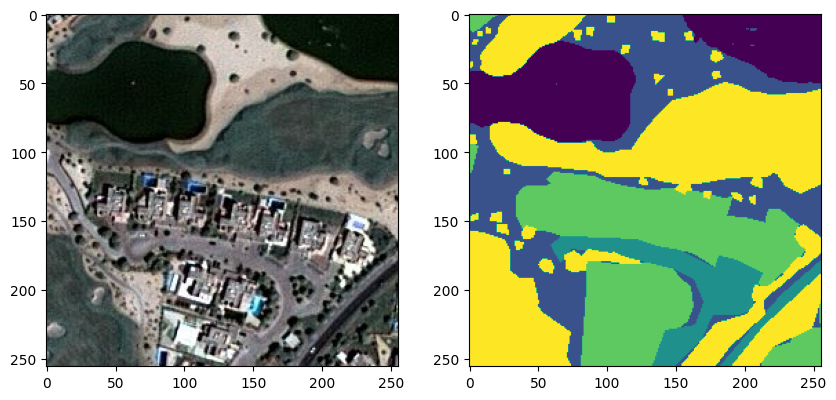

In [24]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])



TRAIN, TEST, SPLIT

In [25]:
master_training_dataset = image_dataset

In [26]:
total_classes = len(np.unique(labels))

In [27]:
total_classes


6

In [ ]:
# !pip install tensorflow

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
  labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [30]:
master_trianing_dataset = image_dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [34]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [35]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


DEEP LEARNING

In [36]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

In [72]:
from keras import backend as K

In [73]:
#  jaccard coeff for model evaluation  = intersection / union

def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef= (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef



In [74]:
# U-NET ARCHITECTURE

def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(.2)(c1)
  c1 = Conv2D(16, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(source_input)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(.2)(c2)
  c2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(.2)(c3)
  c3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(.2)(c4)
  c4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c4 )
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(.2)(c5)
  c5 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides =(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(.2)(c6)
  c6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides =(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(.2)(c7)
  c7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides =(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2], axis=3)
  c8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(.2)(c8)
  c8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides =(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1])
  c9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(.2)(c9)
  c9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c9)


  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)


  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [75]:
# setting model matrix
metrics = ['accuracy', jaccard_coef]

In [76]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, image_height=image_height, image_width=image_width, image_channels=image_channels)

In [77]:
model = get_deep_learning_model()


GENERATING LOSS FUNCTION

In [78]:
!pip install -U -q segmentation-models
# !pip install -q tensorflow==2.8.0
!pip install -q keras==2.5.0rc0
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [79]:
# pip install -U segmentation_models

In [80]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [81]:
import segmentation_models as sm

In [82]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [83]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [84]:
total_loss = dice_loss + (1 * focal_loss)

MODEL COMPILATION

In [85]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [86]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [87]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)         0         ['conv2d_1[0][0]']            
 D)                                                                                               
                                                                                                  
 conv2d_2 (Conv2D)           (None, 128, 128, 32)         4640      ['max_pooling2d[0][0]']   

In [88]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x79299c791ea0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x79299c791ea0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
51/51 [==============================] - ETA: 0s - loss: 0.9943 - accuracy: 0.5840 - jaccard_coef: 0.3029

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x792b203695a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x792b203695a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
51/51 [==============================] - 80s 1s/step - loss: 0.9943 - accuracy: 0.5840 - jaccard_coef: 0.3029 - val_loss: 0.9769 - val_accuracy: 0.6678 - val_jaccard_coef: 0.4075
Epoch 2/100
51/51 [==============================] - 73s 1s/step - loss: 0.9693 - accuracy: 0.6938 - jaccard_coef: 0.4254 - val_loss: 0.9753 - val_accuracy: 0.6745 - val_jaccard_coef: 0.4533
Epoch 3/100
51/51 [==============================] - 73s 1s/step - loss: 0

In [89]:
history_a = model_history

In [90]:
history_a.history

{'loss': [0.994268536567688,
  0.9693393111228943,
  0.9596254825592041,
  0.9533807039260864,
  0.9481949806213379,
  0.9441476464271545,
  0.9402109384536743,
  0.9362785220146179,
  0.931437611579895,
  0.9284588098526001,
  0.9252411127090454,
  0.9227844476699829,
  0.921134889125824,
  0.9211013317108154,
  0.9191870093345642,
  0.9177948236465454,
  0.9168391227722168,
  0.9164720773696899,
  0.9152207374572754,
  0.9155058264732361,
  0.9155523777008057,
  0.9148179292678833,
  0.9140227437019348,
  0.9147399663925171,
  0.9139147996902466,
  0.9130287170410156,
  0.9121496081352234,
  0.9121859073638916,
  0.9117088317871094,
  0.9110997319221497,
  0.9108198285102844,
  0.9101921916007996,
  0.910189151763916,
  0.9092782735824585,
  0.9088206887245178,
  0.9085897207260132,
  0.9082877039909363,
  0.9077418446540833,
  0.9078025817871094,
  0.9075396656990051,
  0.9076741933822632,
  0.9076521396636963,
  0.9065366387367249,
  0.9068295955657959,
  0.9078651666641235,
  0.90

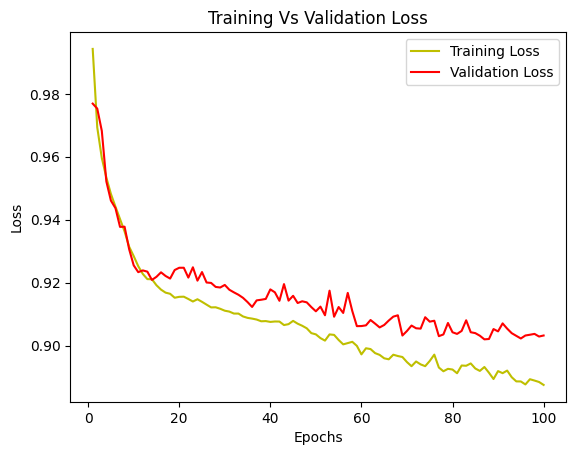

In [91]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

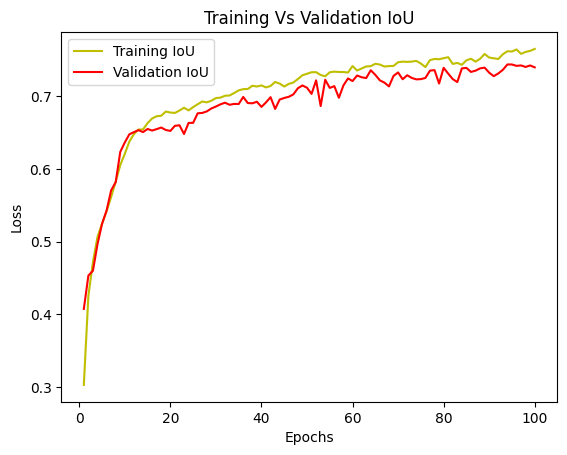

In [92]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [93]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [94]:
y_pred = model.predict(X_test)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7929642291b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7929642291b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 2s 347ms/step


In [95]:
len(y_pred)

142

In [96]:
y_pred

array([[[[1.70655977e-02, 7.86869407e-01, 2.97323894e-02,
          1.35163501e-01, 3.11316028e-02, 3.74014126e-05],
         [1.31601123e-02, 7.33056605e-01, 3.38631533e-02,
          1.76093638e-01, 4.38183956e-02, 8.12695453e-06],
         [6.17527263e-03, 5.28883100e-01, 2.34338194e-02,
          3.56243879e-01, 8.52427408e-02, 2.10342841e-05],
         ...,
         [6.19960949e-03, 8.04185033e-01, 6.74329996e-02,
          8.17861259e-02, 4.03682031e-02, 2.80336481e-05],
         [8.01111851e-03, 8.89249921e-01, 4.73119617e-02,
          4.23798636e-02, 1.30369971e-02, 1.01197556e-05],
         [1.58174839e-02, 8.91630292e-01, 5.61470538e-02,
          2.50716135e-02, 1.12452582e-02, 8.81682936e-05]],

        [[5.50697418e-03, 7.03651190e-01, 3.53878103e-02,
          2.23009512e-01, 3.24056745e-02, 3.87973159e-05],
         [1.79788657e-03, 8.23298573e-01, 3.58398072e-02,
          1.11126810e-01, 2.79315878e-02, 5.09705342e-06],
         [6.28484180e-04, 5.34829676e-01, 2.3330

In [97]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [98]:
len(y_pred_argmax)

142

In [99]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 1, 0, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 2, ..., 3, 1, 1],
        [1, 1, 2, ..., 3, 3, 3],
        [1, 1, 2, ..., 3, 3, 3],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [100]:
y_test_argmax = np.argmax(y_test, axis=3)

In [101]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

COMPARING PREDICTION RESULTS

In [102]:
import random


In [142]:

test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 49ms/step


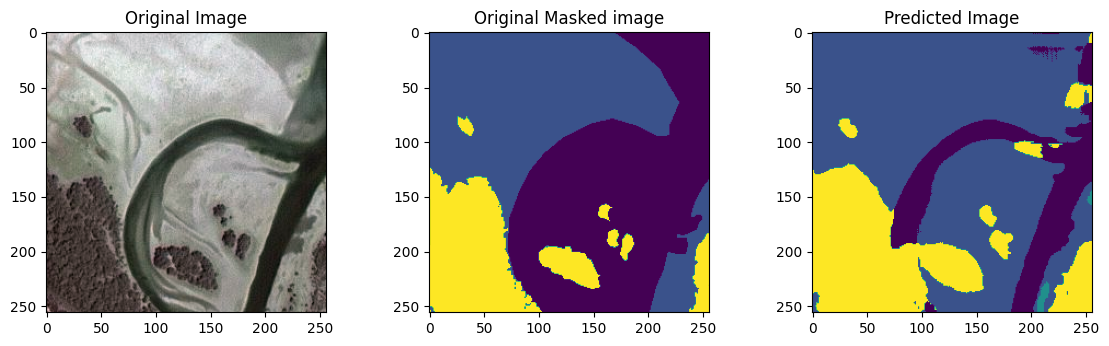

In [143]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [116]:
model.save("satellite_segmentation_full.h5")

In [117]:
!ls -lah

total 19M
drwxr-xr-x 1 root root 4.0K Sep 23 08:05 .
drwxr-xr-x 1 root root 4.0K Sep 23 05:24 ..
drwxr-xr-x 4 root root 4.0K Sep 19 13:19 .config
drwx------ 5 root root 4.0K Sep 23 05:47 drive
drwxr-xr-x 1 root root 4.0K Sep 19 13:19 sample_data
-rw-r--r-- 1 root root  19M Sep 23 08:06 satellite_segmentation_full.h5
